
Minimum Gain: 0.27
Maximum Gain: 7.34

Minimum Input directions: [[-0.608]
 [-0.794]]
Maximum Input directions: [[-0.794]
 [ 0.608]]


C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\tiaan\Anaconda\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

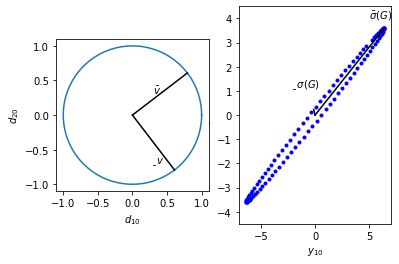

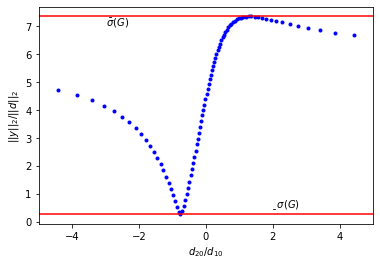

In [5]:
import numpy as np
from robustcontrol.utils import circle 
import matplotlib.pyplot as plt
%matplotlib inline

[d1,d2] = circle(1e-15,1e-15,0.99999999)
gains = []
d_ratio = []
G = np.matrix([[5,4],[3,2]])

# SVD decomposition
[U, S, T] = np.linalg.svd(G)
SVD = np.matrix(S)

print("")
print("Minimum Gain:", np.round(np.matrix.min(SVD), 2))
print("Maximum Gain:", np.round(np.matrix.max(SVD), 2))

print("")
print("Minimum Input directions:", np.round(T[:,-1], 3))
print("Maximum Input directions:", np.round(T[:,0], 3))

for i in range(len(d1)-2):
    d10 = d1[i+1]
    d20 = d2[i+1]
    d = np.matrix([[d10],[d20]])
    d_ratio.append(d10/d20)
    y = G*d
    gain = np.linalg.norm(y)/np.linalg.norm(d)
    gains.append(gain)
    
    plt.figure('Figure 3.6')
    plt.subplot(1,2,2)
    plt.plot(y[0],y[1],'b.')
    plt.xlabel(r'$y_{10}$')
    plt.ylabel(r'$y_{20}$')
    #plt.xlim([-7,7])
    plt.ylim([-4.5,4.5])


# draw gain relationship to input
plt.figure('Figure 3.5')
plt.plot(d_ratio,gains,'b.')
plt.xlabel(r'$d_{20}/d_{10}$')
plt.ylabel(r'$||y||_2/||d||_2$')
plt.xlim([-5, 5])
U,sigmas,V = np.linalg.svd(G)
plt.axhline(max(sigmas),color='red')
plt.axhline(min(sigmas),color='red')
plt.text(-3,max(sigmas)-0.35,r'$\bar \sigma (G)$')
plt.text(2,min(sigmas)+0.25,r'$\underbar{\sigma} (G)$')

# draw unit circle that determine d10 and d20 values    
plt.figure('Figure 3.6')
plt.subplot(1,2,1)
plt.plot(d1,d2)
plt.plot([0, -V[0, 0]], [0, -V[0, 1]], 'k-')
plt.plot([0, V[1, 0]], [0, V[1, 1]], 'k-')
plt.text(0.3, 0.3, r'$\bar v$')
plt.text(0.3, -0.7, r'$\underbar{v}$')
plt.axis('square')
plt.xlabel(r'$d_{10}$')
plt.ylabel(r'$d_{20}$')


# add vectors of min and max singular value to output plot
plt.figure('Figure 3.6')
plt.subplot(1,2,2)
plt.plot([0, -U[0, 0]*max(sigmas)], [0, -U[0, 1]*max(sigmas)], 'k-')
plt.plot([0, U[1, 0]*min(sigmas)], [0, U[1, 1]*min(sigmas)], 'k-')
plt.text(5,4,r'$\bar \sigma (G)$')
plt.text(-2,1.15,r'$\underbar{\sigma} (G)$')

plt.show()